[Problem 1] Number of wheat on 2 x 2 square chess board

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list).reshape(2, 2)    
print("Arrange wheat on a 2 x 2 chess board：\n{}".format(small_board_ndarray))

Arrange wheat on a 2 x 2 chess board：
[[1 2]
 [4 8]]


[Problem 2] Expansion to n x m mass

In [2]:
def calWheatOnChessboard(n, m):
    """
    Calculate number of wheat on an n x m chessboard.    
    --------------    
    Parameters:
    n: int
        Number of rows on chessboard
    m: int
        Number of columns on chessboard        
    --------------
    Return:
        Number of wheats on chessboard
    """
    tmp = [1]
    for _ in range(n * m - 1):
        tmp.append(tmp[-1] * 2)            
    board = np.array(tmp, dtype = np.uint64).reshape(n, m)
    return board

board = calWheatOnChessboard(8, 8)
print("Arrange wheat on a 8 x 8  chess board：\n{}".format(board))

Arrange wheat on a 8 x 8  chess board：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
  

[Problem 3] Total number of wheat

Total number of wheat: 18446744073709551615


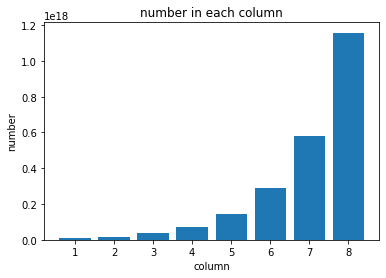

In [3]:
wheat_sum = np.sum(board)
print("Total number of wheat: {}".format(wheat_sum))

wheat_average = np.mean(board, axis=0, dtype= np.float64)

%matplotlib inline      
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, wheat_average.size + 1), wheat_average)
plt.show()

[Problem 4] Heat map of the number of wheat

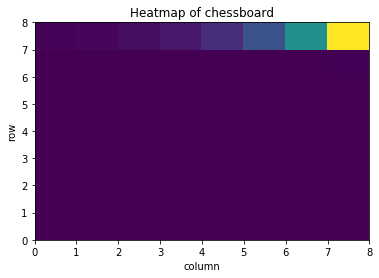

In [4]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("Heatmap of chessboard")
plt.pcolor(board)
plt.show()

[Problem 5] How many times is the second half as long as the first half

In [5]:
first_half = np.sum(board[0:3])
second_half = np.sum(board[4:7])
print("The second half is greater than {} times that of first half.".format(second_half / first_half))


The second half is greater than 4294967296.0 times that of first half.


[Problem 6] Expansion to n x m mass by another calculation method

In [6]:
def calWheatOnChessboardAppend(n, m):
    """
    Calculate number of wheat on an n x m chessboard.    
    --------------    
    Parameters:
    n: int
        Number of rows on chessboard
    m: int
        Number of columns on chessboard        
    --------------
    Return:
        Number of wheats on chessboard
    """
    board = np.array([1])
    for _ in range(n * m - 1):
        board = np.append(board, board[-1] * 2).astype(np.uint64)    
    return board.reshape(n, m)

def calWheatOnChessboardBroadcast(n, m):
    """
    Calculate number of wheat on an n x m chessboard.    
    --------------    
    Parameters:
    n: int
        Number of rows on chessboard
    m: int
        Number of columns on chessboard        
    --------------
    Return:
        Number of wheats on chessboard
    """
    board = 2 ** np.arange(n * m, dtype = np.uint64)
    return board.reshape(n, m)

new_board = calWheatOnChessboardAppend(8, 8)
print("Arrange wheat on a 8 x 8  chess board：\n{}\n".format(new_board))

new_board = calWheatOnChessboardBroadcast(8, 8)
print("Arrange wheat on a 8 x 8  chess board：\n{}".format(new_board))

Arrange wheat on a 8 x 8  chess board：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
  

[Problem 7] Comparing calculation times

In [7]:
%%timeit
board1 = calWheatOnChessboard(8, 8)

59.5 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%%timeit
board2 = calWheatOnChessboardAppend(8, 8)

2.72 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%%timeit
board3 = calWheatOnChessboardBroadcast(8, 8)

13.7 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Using broadcast approach is the fastest, next is the array creation from python list, and the slowest is the one using append approach.